<a href="https://colab.research.google.com/github/arjun-anapalli/Spectacles/blob/main/DT_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K- means clustering is done in this section in 2 ways: 1 on iris dataset; The other on a self-defined dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [3]:
iris = load_iris()
X = iris.data  # Features (4D)
y = iris.target  # Actual labels (not used in clustering)

print("Shape of dataset:", X.shape)

Shape of dataset: (150, 4)


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)
predicted_labels = kmeans.labels_

print("Cluster centroids:\n", kmeans.cluster_centers_)

Cluster centroids:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [5]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['True Label'] = y
df['KMeans Cluster'] = predicted_labels

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),True Label,KMeans Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


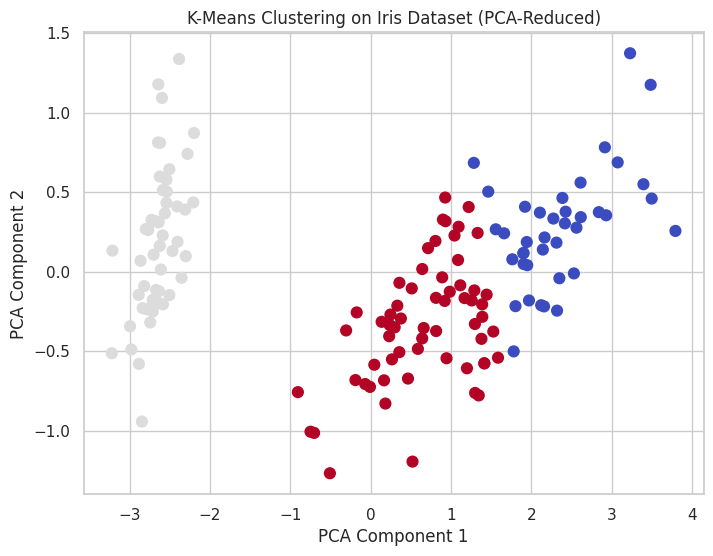

In [6]:
# Visualize using PCA (reduce 4D → 2D for plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=predicted_labels, cmap='coolwarm', s=60)
plt.title("K-Means Clustering on Iris Dataset (PCA-Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, predicted_labels)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


The code Section below performs K-Means Clustering on a set of self-defined data points is done here. This sector contains a short dataset, (mere cartesian coordinates), for wich the centroids are calculated and KMC is done.

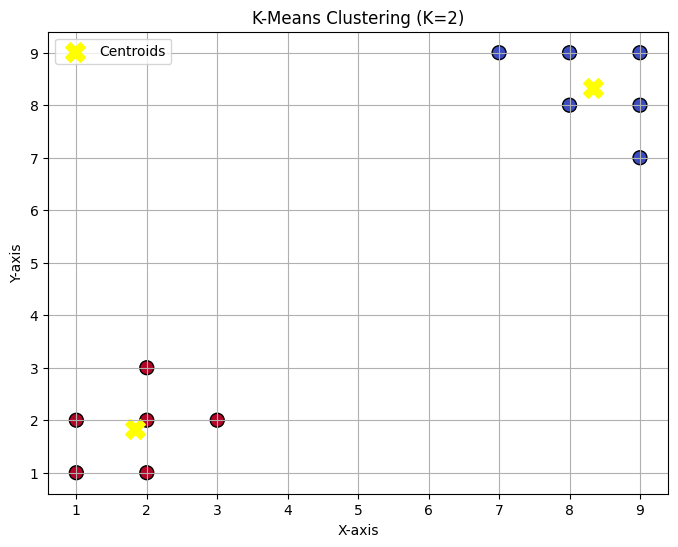

In [1]:
from sklearn.cluster import KMeans

X = np.array([
    [1, 2], [2, 1], [1, 1], [2, 2], [3, 2], [2, 3],  # Cluster A
    [8, 8], [9, 8], [8, 9], [9, 9], [7, 9], [9, 7]   # Cluster B
])

kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=100, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (K=2)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()
plt.show()
